The molecule inserted looks like this:


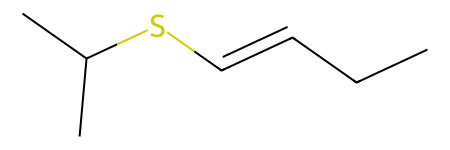

Reactant 1:


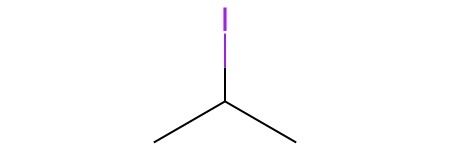

Reactant 2:


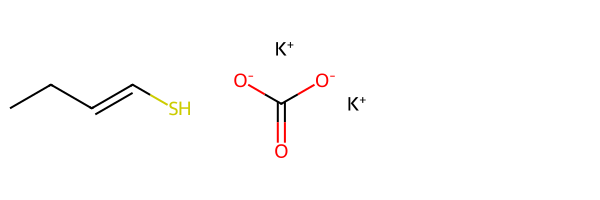

In [15]:
from rdkit import Chem
from itertools import chain
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True


mol_smiles = 'CC(C)SC=CCC'
iodine_smiles = 'I'
potassium_carbonate_smiles ='C(=O)([O-])[O-].[K+].[K+]'
mol=Chem.MolFromSmiles(mol_smiles)
print (f"The molecule inserted looks like this:")
display(mol)
if mol.HasSubstructMatch(Chem.MolFromSmarts('[^3][S]')):
    iodine = Chem.MolFromSmiles(iodine_smiles)
    potassium_carbonate = Chem.MolFromSmiles(potassium_carbonate_smiles)
    rxn_1 = AllChem.ReactionFromSmarts('[C^3:1][S:2]>>[C:1].[S:2]')
    products = list(chain.from_iterable(rxn_1.RunReactants((mol, ))))
    rxn_2 = AllChem.ReactionFromSmarts('[C:1].[I:2]>>[C:1][I:2]')
    reactant_1 = list(chain.from_iterable(rxn_2.RunReactants((products[0],iodine))))
    reactant_2 = [products[1], potassium_carbonate]
    print (f"Reactant 1:")
    display(reactant_1[0])
    print (f"Reactant 2:")
    display(Draw.MolsToGridImage(reactant_2))
else:
    print(f"Molecule has no known disconnections")